In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import copy

# 加载图片
im = Image.open('./../image/lena.png')
print(im.size)

(412, 413)


In [2]:
img = np.array(im)      # image类 转 numpy
print(img.shape)

(413, 412, 4)


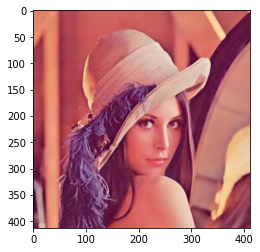

In [3]:
#
img = img[:,:,0:3]
plt.imshow(img)
plt.show()

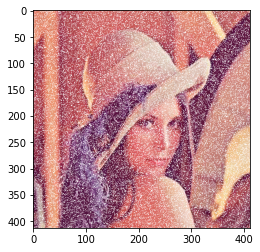

In [4]:

# 对图像加噪声
import random

# 这里是噪声点得比例
percentage = 0.2
noiseImg =copy.deepcopy(img)
w, h,d = img.shape
for i in range(w):
    for j in range(h):
        # 随机判断是否需要添加噪声
        if random.randint(0,100) < 100*percentage:

            noiseImg[i][j] = [255, 255, 255]
        else:
            continue

plt.imshow(noiseImg, 'Blues')
plt.show()


In [5]:
def numpy_conv(inputs,filter,padding="VALID"):
    H, W = inputs.shape
    filter_size = filter.shape[0]
    # default np.floor
    filter_center = int(filter_size / 2.0)
    filter_center_ceil = int(np.ceil(filter_size / 2.0))

    #这里先定义一个和输入一样的大空间，但是周围一圈后面会截掉
    result = np.zeros((H,W))
    #更新下新输入,SAME模式下，会改变HW
    H, W = inputs.shape
    #print("new size",H,W)
    #卷积核通过输入的每块区域，stride=1，注意输出坐标起始位置
    for r in range(0, H - filter_size + 1):
        for c in range(0, W - filter_size + 1):
            # 池化大小的输入区域
            cur_input = inputs[r:r + filter_size,
                        c:c + filter_size]
            #和核进行乘法计算
            cur_output = cur_input * filter
            #再把所有值求和
            conv_sum = np.sum(cur_output)
            #当前点输出值
            result[r, c] = int(conv_sum / cur_output.size)
    return result


原图


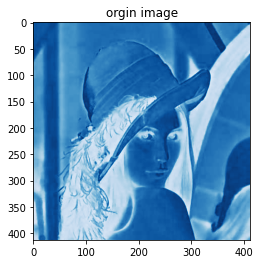

噪声图


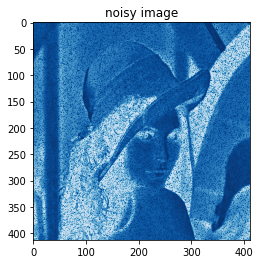

In [6]:
#原图
print('原图')
b = img[:,:,0:1]
plt.title('orgin image')
plt.imshow(b, 'Blues')
plt.show()


#噪声
print('噪声图')
b = noiseImg[:,:,0:1]
plt.title('noisy image')
plt.imshow(b, 'Blues')
plt.show()


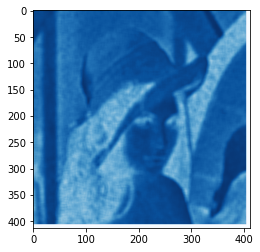

In [7]:
# filterKernel = np.array([
#     [1, 1, 1],
#     [1, 1, 1],
#     [1, 1, 1]
# ])
filterKernel = np.ones((8,8))



b = noiseImg[:,:,0:1]
b = b.reshape(b.shape[0], -1)

bSmooth = numpy_conv(b, filterKernel)
plt.imshow(bSmooth, 'Blues')


In [8]:
bSmooth.shape

(413, 412)

In [9]:


def conv(inputs, filter,strides=[1,1], padding="SAME"):
    '''

    :param inputs:  [h, w, c_in]
    :param filter:  [k, k, c_out]
    :param strides:
    :param padding:
    :return: [h, w, c_in,c_out]
    '''
    H, W,C_in = inputs.shape
    filter_size = filter.shape[0]
    # C_out指核对个数，也是最后结果对通道个数
    C_out = filter.shape[2]
    # 同样我们任务核对宽高相等
    '''

        '''
    result = np.zeros((H, W,C_in, C_out))
    # 核个数对循环
    for channel_out in range(C_out):
        # 输入通道数对循环
        for channel_in in range(C_in):
            # 当前通道对数据
            channel_data = inputs[:,:,channel_in]
            # 采用上面对逻辑，单核单通道卷积,然后累计
            result[ :, :,channel_in,channel_out] += numpy_conv(channel_data, filter[:,:,channel_out],padding)

    # 图片只能用整数显示
    result = result.astype(np.int32)
    

    return result



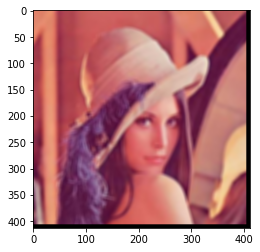

In [10]:

filterKernel = np.ones((8,8,1))

multipleChannelImg = conv(inputs=img, filter=filterKernel)
multipleChannelImg  =  multipleChannelImg.reshape(413,412,-1).astype(np.int32)

plt.imshow(multipleChannelImg)
plt.show()